In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.groupby('sex')[['survived']].mean() #以性別分類，計算生還者平均值, using groupby

,survived
sex,
female,0.742038
male,0.188908


In [8]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack() #以性別、船艙等級分類，計算生還者平均值 using groupby

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [9]:
titanic.pivot_table('survived', index='sex', columns='class') #using pivot table 樞紐值表

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [10]:
age = pd.cut(titanic['age'], [0, 18,50, 80]) #pd.cut???
titanic.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 50]  0.967213  0.912281  0.413793
       (50, 80]  1.000000  0.666667  1.000000
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 50]  0.442857  0.069444  0.139896
       (50, 80]  0.192308  0.083333  0.000000

連續性的數值，可以使用cut&qcut進行離散化，cut函数是利用數值區間將數值分類，qcut則是用分位數。
換句話說，cut用在長度相等的類別，qcut用在大小相等的類別。

In [11]:
fare = pd.qcut(titanic['fare'], 2) #pd.qcut???
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 50]              NaN  0.916667  0.428571          0.967213   
       (50, 80]              NaN  0.000000  1.000000          1.000000   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 50]              0.0  0.095238  0.131737          0.469697   
       (50, 80]              NaN  0.111111  0.000000          0.192308   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 50]  0.909091  0.391304  
       (50, 80]  1.000000       NaN  
male   (0, 18]   0.818182  0.178571  
       (18, 50]  0.033333  0.192308  
       (50, 80]  0.000000    

In [8]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [9]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## Birthrate Data

In [10]:
births = pd.read_csv('data/births.csv')

In [12]:
births.shape

(15547, 5)

In [13]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [14]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


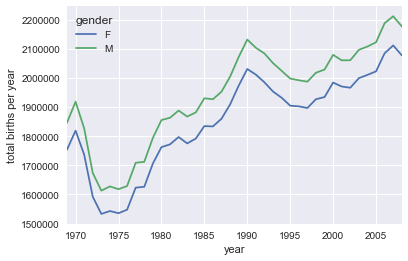

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [16]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [17]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [18]:
births['day'] = births['day'].astype(int)

In [19]:
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

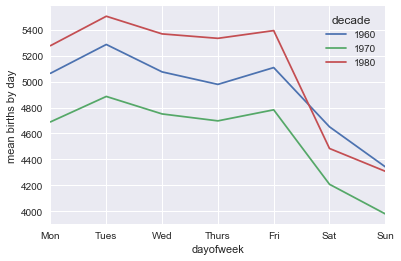

In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');